# Homework 2

**Joseph Livesey**

**October 14, 2021**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal

## Problem 1

There is only one way to roll snake eyes: rolling two 1s. There are six ways to roll sevens: 1 + 6, 2 + 5, 3 + 4, 4 + 3, 5 + 2, and 1 + 6. Thus, the probability of rolling sevens is six times larger.

$$ \frac{P(\text{sevens})}{P(\text{snake eyes})} = 6 $$

## Problem 2

The probability mass function for one roll of a die is

$$ f_1(k) = \begin{cases} \frac{1}{6}, & k \in \{ 1, 2, 3, 4, 5, 6 \}, \\ 0, & \text{otherwise}. \end{cases} $$

So, to find the probability distribution for two dice, we convolve $f_1(k)$ with itself as follows.

$$ f_2(k) = f_1(k) * f_1(k) = \sum_t f_1(t) f_1(k - t) $$

First, we do this analytically.

$$
f_2(1) = \sum_t f_1(t) f_1(1 - t) = 0 \\
f_2(2) = \sum_t f_1(t) f_1(2 - t) = f_1(1) f_1(1) = \frac{1}{36} \\
f_2(3) = \sum_t f_1(t) f_1(3 - t) = f_1(1) f_1(2) + f_1(2) f_1(1) = \frac{1}{18} \\
f_2(4) = \sum_t f_1(t) f_1(4 - t) = f_1(1) f_1(3) + f_1(2) f_1(2) + f_1(3) f_1(1) = \frac{1}{12} \\
f_2(5) = \sum_t f_1(t) f_1(5 - t) = f_1(1) f_1(4) + f_1(2) f_1(3) + f_1(3) f_1(2) + f_1(4) f_1(1) = \frac{1}{9} \\
f_2(6) = \sum_t f_1(t) f_1(6 - t) = f_1(1) f_1(5) + f_1(2) f_1(4) + f_1(3) f_1(3) + f_1(4) f_1(2) + f_1(5) f_1(1) = \frac{5}{36} \\
f_2(7) = \sum_t f_1(t) f_1(7 - t) = f_1(1) f_1(6) + f_1(2) f_1(5) + f_1(3) f_1(4) + f_1(4) f_1(3) + f_1(5) f_1(2) + f_1(6) f_1(1) = \frac{1}{6} \\
f_2(8) = \sum_t f_1(t) f_1(8 - t) = f_1(2) f_1(6) + f_1(3) f_1(5) + f_1(4) f_1(4) + f_1(5) f_1(3) + f_1(6) f_1(2) = \frac{5}{36} \\
f_2(9) = \sum_t f_1(t) f_1(9 - t) = f_1(3) f_1(6) + f_1(4) f_1(5) + f_1(5) f_1(4) + f_1(6) f_1(3) = \frac{1}{9} \\
f_2(10) = \sum_t f_1(t) f_1(10 - t) = f_1(4) f_1(6) + f_1(5) f_1(5) + f_1(6) f_1(4) = \frac{1}{12} \\
f_2(11) = \sum_t f_1(t) f_1(11 - t) = f_1(5) f_1(6) + f_1(6) f_1(5) = \frac{1}{18} \\
f_2(12) = \sum_t f_1(t) f_1(12 - t) = f_1(6) f_1(6) = \frac{1}{36}
$$

We must now verify that these probabilities sum to unity.

$$ \sum_k f_2(k) = \frac{1}{36} + \frac{1}{18} + \frac{1}{12} + \frac{1}{9} + \frac{5}{36} + \frac{1}{6} + \frac{5}{36} + \frac{1}{9} + \frac{1}{12} + \frac{1}{18} + \frac{1}{36} = 1 $$

Now, we do it numerically.

In [2]:
def f1(k):
    if k >= 1 and k <= 6:
        prob = 1.0/6
    else:
        prob = 0
    return prob

def f2(k):
    prob = 0
    for t in range(k):
        prob += f1(t) * f1(k - t)
    return prob

for k in np.arange(1,13):
    print('f_2(' + str(k) + ')=' + str(f2(k)))

f_2(1)=0.0
f_2(2)=0.027777777777777776
f_2(3)=0.05555555555555555
f_2(4)=0.08333333333333333
f_2(5)=0.1111111111111111
f_2(6)=0.1388888888888889
f_2(7)=0.16666666666666669
f_2(8)=0.1388888888888889
f_2(9)=0.1111111111111111
f_2(10)=0.08333333333333333
f_2(11)=0.05555555555555555
f_2(12)=0.027777777777777776


These values match the ones we derived analytically.

## Problem 3

The mean of the discrete probability distribution $f_2(k)$ is

$$ \mu = E(k) = \sum_k k f_2(k). $$

The variance is

$$ \sigma^2 = \text{Var}(k) = E(k^2) - E(k)^2 = \sum_k k^2 f_2(k) - \left ( \sum_k k f_2(k) \right )^2. $$

In [3]:
mean = sum([k * f2(k) for k in np.arange(1,13)])
var  = sum([k**2 * f2(k) for k in np.arange(1,13)]) - mean**2

print(mean, var)

7.0 5.833333333333336


The mean of the distribution is $\mu=7.0$, while the variance is $\sigma^2 \approx 5.83$.

## Problem 4

Let $f_{10}(k)$ be the probability density function for the sum of 10 rolls of dice. We compute this function by convolving $f_1(k)$ with itself 10 times.

In [4]:
# Array representing the pmf of 1 roll
f_1 = [f1(k) for k in np.arange(1, 7)]

# Convolution to find the pmf of 10 rolls
def f10():
    f = [f_1[i] for i in range(len(f_1))]
    for _ in range(9):
        f = np.convolve(f, f_1)
    return f

In [5]:
f10()

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

Here is a plot of the average, which we find by taking the values of $k$ and dividing by the number of trials, 10.

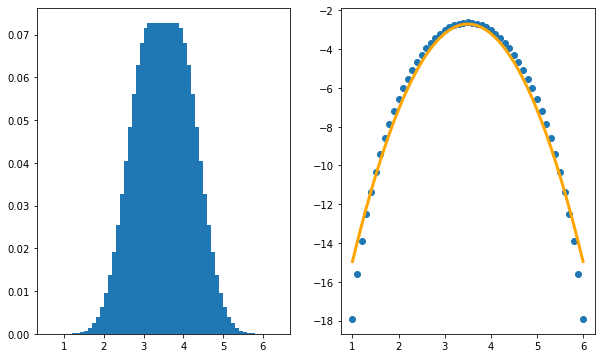

In [6]:
k = np.arange(10, 61)

fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].bar(k/10, f10())
ax[1].scatter(k/10, np.log(f10()))
ax[1].plot(k/10, -(1.4*(k/10 - 3.5))**2 - 2.7, c='orange', lw=3);

This appears to be a Gaussian distribution, because the semilog plot of the data is well-fit by a parabola.

## Problem 5

We can make two different Gaussian distributions in `scipy` and combine them using a convolution.

In [7]:
xx = np.linspace(0, 10, 1000)

f = [stats.norm.pdf(x, loc=5.0, scale=1.0) for x in xx]

ff = signal.convolve(f, f)

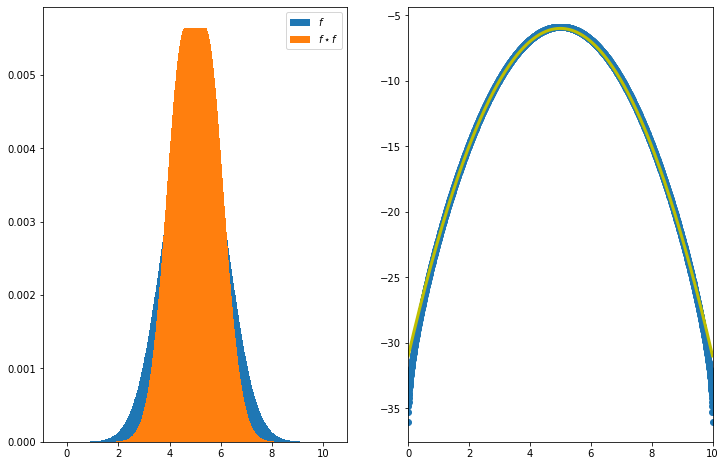

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].bar(xx, f/sum(f), label=r'$f$')
ax[0].bar(np.linspace(0, 20, len(ff))/2, ff/sum(ff/2), label=r'$f \star f$')
ax[0].legend(loc=0)
ax[1].scatter(np.linspace(0, 20, len(ff))/2, np.log(ff/sum(ff)))
ax[1].plot(xx, -(xx - 5.0)**2 - 6.0, c='y', lw=3)
ax[1].set_xlim(0, 10);

We have verified that the convolution (sum of the Gaussian with itself, and therefore also the average) is indeed a Gaussian distribution, since its logarithm is well-fit by a parabola. We note that the mean remains the same as that of the original distribution, with the standard deviation having decreased. This is important because it means we can diminish uncertainty in our measurements by averaging the background distribution over time.